In [ ]:
!pip install gdown

In [ ]:
import gdown
import shutil
# https://drive.google.com/file/d/184zNYYTle1XTs9jI91SBEqFrn6Mpao0G/view?usp=sharing
# Replace the file ID in the URL with the actual file ID
# https://drive.google.com/file/d/12r8nNLc0QzjleOAYA6fXlbo8Gj_aw-ko/view?usp=sharing
# https://drive.google.com/file/d/1RMrsLM4WkHHjOr3jyWJBOto09Vcp6Qjm/view?usp=sharing

file_id = '1RMrsLM4WkHHjOr3jyWJBOto09Vcp6Qjm'
url = f'https://drive.google.com/uc?id={file_id}'

# Specify the destination path where you want to save the file
output = 'SIBI.zip'

# Download the file
gdown.download(url, output, quiet=False)
shutil.unpack_archive(output, "/content/dataset")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
!pip install mediapipe
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 22.8 MB/s eta 0:00:00


In [ ]:
# import os
# import cv2
# import mediapipe as mp
# import numpy as np
# def autocrop():
#     mp_hands = mp.solutions.hands
#     hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

#     crop_dir = os.path.join("/content/dataset_croped")
#     raw_dir = os.path.join("/content/dataset/SIBI")
#     if not os.path.exists(crop_dir):
#             os.makedirs(crop_dir)

#     counter = 0

#     for folder in os.listdir(os.path.join(raw_dir)):
#       for kategori in os.listdir(os.path.join(raw_dir, folder)):
#         for img_path in os.listdir(os.path.join(raw_dir, folder, kategori)):
#           data_aux = []
#           x_ = []
#           y_ = []
#           img= cv2.imread(os.path.join(raw_dir, folder, kategori, img_path))
#           img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#           results = hands.process(img_rgb)
#           if results.multi_hand_landmarks:
#               for hand_landmarks in results.multi_hand_landmarks:
#                   for i in range(len(hand_landmarks.landmark)):
#                       x = hand_landmarks.landmark[i].x
#                       y = hand_landmarks.landmark[i].y
#                       H, W, _ = img.shape
#                       x_.append(x)
#                       y_.append(y)

#                   x1 =int(min(x_) * W)
#                   y1 =int(min(y_) * H)
#                   x2 =int(max(x_) * W)
#                   y2 =int(max(y_) * H)
#                   x1, y1, x2, y2 = max(0, x1), max(0, y1), min(W, x2), min(H, y2)
#                   if (x2 - x1) > (y2 - y1):
#                       # Menyesuaikan y2 untuk menjaga rasio persegi
#                       y2 = y1 + (x2 - x1)
#                       # Menyesuaikan tinggi persegi
#                       selisih = y2-y1
#                       y2 = int(0.85 * y2)
#                       y1 = int(y2-selisih)
#                   else:
#                       # Menyesuaikan x2 untuk menjaga rasio persegi
#                       x2 = x1 + (y2 - y1)
#                       # Menyesuaikan lebar persegi
#                       selisih = x2-x1
#                       x2 = int(0.85 * x2)
#                       x1 = int(x2 - selisih)

#                   x1 = int(x1)
#                   x2 = int(x2)
#                   y1 = int(y1)
#                   y2 = int(y2)
#                   print(x1,x2, y1, y2)

#                   hand_crop = img_rgb[y1:y2, x1:x2]
#                   cv2.waitKey(25)
#                   if not os.path.exists(os.path.join(crop_dir, folder, kategori )):
#                       os.makedirs(os.path.join(crop_dir, folder, kategori ))
#                   cv2.imwrite(os.path.join(crop_dir, folder, kategori, '{}.jpg'.format(counter)),  cv2.cvtColor(hand_crop, cv2.COLOR_RGB2BGR))
#           counter +=1

# autocrop()


In [ ]:
# import shutil

# # Tentukan nama folder yang ingin Anda kompres
# folder_to_compress = '/content/dataset_sibi/'

# # Tentukan nama file ZIP yang dihasilkan
# zip_file_name = '/content/drive/MyDrive/SIBI'

# # Kompresi folder menjadi file ZIP
# shutil.make_archive(zip_file_name, 'zip', folder_to_compress)

# # Tampilkan lokasi file ZIP yang dihasilkan
# print(f'File ZIP telah dibuat di: {zip_file_name}')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
input_folder = "/content/dataset"

In [ ]:
import os
for f in os.listdir(input_folder):
  print(f, len(os.listdir(os.path.join(input_folder,f))))

validation 27
train 27
test 27


In [ ]:
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'
val_dir = '/content/dataset/validation'

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=8,
                    fill_mode='nearest'
                    )

In [ ]:
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    )


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=126,
        class_mode='categorical',
        color_mode='grayscale'
        )

Found 2841 images belonging to 27 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(64, 64),
        batch_size=126,
        class_mode='categorical',
        color_mode='grayscale')

Found 499 images belonging to 27 classes.


In [ ]:
model = Sequential([
    Conv2D(256, (3,3), strides=1, padding='same', activation='relu', input_shape=(64, 64, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2, padding='same'),
    Conv2D(128, (3,3), strides=1, padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2, padding='same'),
    Conv2D(64, (3,3), strides=1, padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2, padding='same'),
    Conv2D(32, (3,3), strides=1, padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2, padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(27, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 256)       2560      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 256)       1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.78 and logs.get('val_accuracy') > 0.85):
            print("\nReached 0.85 accuracy and val_accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
callbacks = myCallback()
history = model.fit(
      train_generator,
      epochs=15,
      batch_size=32,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      validation_data=validation_generator,
      verbose=1,
      validation_steps=validation_generator.samples // validation_generator.batch_size,
      # callbacks=callbacks
)

Epoch 1/15
22/22 [==============================] - 94s 3s/step - loss: 2.8176 - accuracy: 0.1867 - val_loss: 3.2722 - val_accuracy: 0.0450
Epoch 2/15
22/22 [==============================] - 83s 4s/step - loss: 1.5857 - accuracy: 0.5429 - val_loss: 3.2482 - val_accuracy: 0.0450
Epoch 3/15
22/22 [==============================] - 74s 3s/step - loss: 0.9300 - accuracy: 0.7355 - val_loss: 3.2036 - val_accuracy: 0.0582
Epoch 4/15
22/22 [==============================] - 78s 4s/step - loss: 0.6414 - accuracy: 0.8180 - val_loss: 3.1008 - val_accuracy: 0.1746
Epoch 5/15
22/22 [==============================] - 74s 3s/step - loss: 0.4313 - accuracy: 0.8692 - val_loss: 2.9596 - val_accuracy: 0.4788
Epoch 6/15
22/22 [==============================] - 70s 3s/step - loss: 0.3493 - accuracy: 0.8943 - val_loss: 2.8103 - val_accuracy: 0.6984
Epoch 7/15
22/22 [==============================] - 73s 3s/step - loss: 0.2674 - accuracy: 0.9175 - val_loss: 2.7497 - val_accuracy: 0.7222
Epoch 8/15
22/22 [==

In [ ]:
model.evaluate(validation_generator)

4/4 [==============================] - 14s 4s/step - loss: 1.0912 - accuracy: 0.9138


[1.09116792678833, 0.913827657699585]

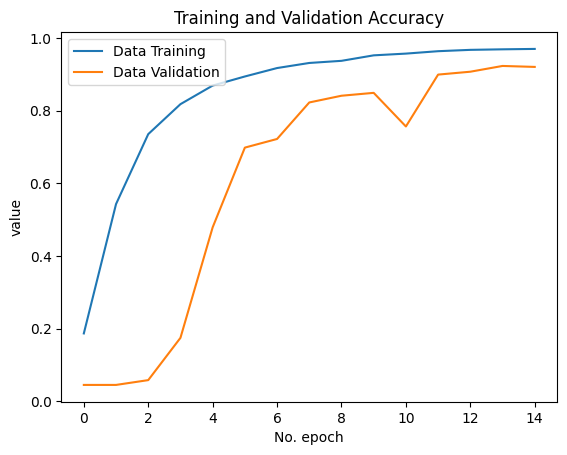

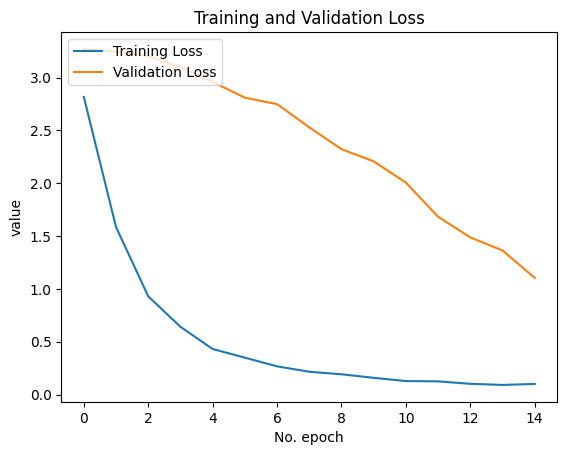

In [ ]:
from matplotlib import pyplot as plt


plt.plot(history.history['accuracy'], label='Data Training')
plt.plot(history.history['val_accuracy'], label='Data Validation')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
input_size = (64,64)
channel = (26,)
input_shape = input_size + channel

labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N',
          'O','P','Q','R','S', 'Spasi', 'T','U','V','W','X','Y','Z']

In [ ]:
def preprocess(img, input_size):
    nimg = img.convert('L').resize(input_size, resample=Image.BICUBIC)
    img_arr = np.array(nimg) / 255.0
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [ ]:
import os
from google.colab import files

SAVE_MODEL_NAME = "slang_app.h5"
save_model_path = os.path.join( SAVE_MODEL_NAME)

print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)


Saving Model At slang_app.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
MODEL_PATH = '/content/slang_app.h5'
model = load_model(MODEL_PATH,compile=False)

In [ ]:
import os
categories = os.listdir(test_dir)
full_percentage_a = 0
full_percentage_b = 0

for category in categories:
        category_path = os.path.join(test_dir, category)
        print("______________________________")
        print(category)
        files = [f for f in os.listdir(category_path) if f.endswith('.jpg') or f.endswith('.png')]
        a = 0
        b = 0
        for data in files:
            imgg = Image.open(os.path.join(category_path, data))
            X = preprocess(imgg,input_size)
            X = reshape([X])
            y = model.predict(X)
            print( labels[np.argmax(y)], np.max(y) )
            if labels[np.argmax(y)] == category:
              a +=1
              b +=1
            else:
              b +=1
        print(f"percentage is: {a}/{b}")
        full_percentage_a += a
        full_percentage_b += b





______________________________
C
1/1 [==============================] - 0s 361ms/step
C 0.14152664
1/1 [==============================] - 0s 20ms/step
C 0.7975986
1/1 [==============================] - 0s 20ms/step
C 0.9042309
1/1 [==============================] - 0s 17ms/step
C 0.24392188
1/1 [==============================] - 0s 16ms/step
C 0.26902735
1/1 [==============================] - 0s 16ms/step
C 0.3851032
1/1 [==============================] - 0s 15ms/step
G 0.31541932
1/1 [==============================] - 0s 16ms/step
C 0.3570422
1/1 [==============================] - 0s 16ms/step
C 0.8684321
1/1 [==============================] - 0s 17ms/step
C 0.24453166
1/1 [==============================] - 0s 17ms/step
C 0.45068055
1/1 [==============================] - 0s 16ms/step
C 0.8377398
1/1 [==============================] - 0s 19ms/step
C 0.8244118
1/1 [==============================] - 0s 16ms/step
C 0.9032633
1/1 [==============================] - 0s 19ms/step
C 0.23129834

In [ ]:
print(f"{full_percentage_a}/{full_percentage_b} or {full_percentage_a/full_percentage_b}")

471/522 or 0.9022988505747126


In [ ]:
from google.colab import files
im = files.upload()
if im:
    filename = next(iter(im))
    print("Uploaded:", filename)

Saving augmented_image_1.jpg to augmented_image_1.jpg
Uploaded: augmented_image_1.jpg


In [ ]:
imgg = Image.open(filename)
X = preprocess(imgg,input_size)
X = reshape([X])

y = model.predict(X)
print(y)
print(labels[np.argmax(y)], np.max(y), np.min(y))

1/1 [==============================] - 0s 17ms/step
[[0.00569799 0.00218002 0.02628696 0.37136677 0.01049853 0.01944506
  0.02124954 0.02602992 0.04131415 0.00452504 0.13968165 0.04363346
  0.00513959 0.00517567 0.01361578 0.03729489 0.09663    0.03782442
  0.01223374 0.00312865 0.01267879 0.00884593 0.0014965  0.00110735
  0.00975342 0.04047634 0.00268981]]
D 0.37136677 0.0011073522
